In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import random
import pickle

import mlrfit as mf
import mfmodel as mfm

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(1001)
random.seed(1001)

#  Matrix definition

In [3]:
rank = 30
mtype = 'assetcov_gics'

with open("../../mlr_fitting_private/data_finance/crsp_gics_5k_hpart.pkl", "rb") as f:
       gics_hpart = pickle.load(f)

with open('../../mlr_fitting_private/data_finance/crsp_gics_5k_C.npy', 'rb') as f:
       C = np.load(f)

m = n = gics_hpart['rows']['pi'].size
part_sizes = []
for level in range(len(gics_hpart['rows']['lk'])):
    part_sizes += [gics_hpart['rows']['lk'][level].size-1]
    print(f"{level=}, {gics_hpart['rows']['lk'][level].size-1}")

Z = mf.demean_clip(C)
# features are presented in general order
unpermuted_A = Z @ Z.T / (Z.shape[1]-1)

level=0, 1
level=1, 11
level=2, 24
level=3, 69
level=4, 157
level=5, 5000


In [4]:
np.sort(np.abs(np.linalg.eigvalsh(unpermuted_A)))[::-1][:10]

array([1.80995933, 0.24351866, 0.17073495, 0.11152992, 0.08905731,
       0.080994  , 0.06320885, 0.05705067, 0.05527067, 0.05144684])

In [5]:
np.histogram(np.sort(np.abs(np.linalg.eigvalsh(unpermuted_A)))[::-1][:100], bins=8)

(array([99,  0,  0,  0,  0,  0,  0,  1]),
 array([0.02193369, 0.24543689, 0.4689401 , 0.6924433 , 0.91594651,
        1.13944971, 1.36295292, 1.58645612, 1.80995933]))

In [6]:
C.shape, unpermuted_A.shape, unpermuted_A.min(), unpermuted_A.max(), unpermuted_A.mean(), unpermuted_A.std()

((5000, 300),
 (5000, 5000),
 -0.001839477534559251,
 0.014836883129622934,
 0.0002737358427138843,
 0.00025728376347159727)

In [7]:
filename = "%s_r%d_%d"%(mtype, rank, n)

In [8]:
# GICS hierarchy
num_levels = len(gics_hpart['rows']['lk'])

In [9]:
# permute to put clusters on diagonal
Y = Z[gics_hpart["rows"]["pi"], :].T
N = Y.shape[0]

In [10]:
Y.mean(), Y.max(), Y.min(), np.median(Y)

(-0.00027599359051962765,
 1.7531290483245723,
 -0.6189932233333333,
 -0.0006269800000000001)

In [11]:
row_selectors, si_groups, F_hpart = mfm.row_col_selections(gics_hpart)

num_levels=6, num_sparsities=157
(157, 5) [  0  10  23  68 156]


In [12]:
obj_frobs = {}
obj_mle = {}

# $[29, 0, 0, 0, 0, 1]$

In [13]:
ranks = np.array([rank-1, 0, 0, 0, 0, 1])

# Frobenius norm

In [14]:
frob_mfm, obj_frobs[str(ranks)] = mfm.fast_frob_fit_loglikehood(unpermuted_A, Y, F_hpart, gics_hpart, ranks, printing=True, eps_ff=1e-3)

/Users/parshakova.tanya/Documents/projects/MLR_Matrices/mlr_fitting/mlrfit/utils.py:408: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  hat_A_except_level[r1:r2, c1:c2] += np.dot(B_level[r1:r2], C_level[c1:c2].T)


itr=0, 0.1541325347909012, [29  0  0  0  0  1]
itr=1, 0.1541325347909012, [29  0  0  0  0  1]
itr=1, 0.15379449543341234, [29  0  0  0  0  1], time_v_epoch=10.485915184020996, time_loss=0.7195429801940918
itr=2, 0.15379249118337152, [29  0  0  0  0  1], time_v_epoch=10.337224960327148, time_loss=0.7333102226257324
FR: obj_frob = 11808.872096245648
mf.rel_diff(hat_A.matrix(), den=undermuted_A)=0.15379235173974629 
np.linalg.slogdet(hat_A.matrix())=(1.0, -37702.343185018195)


# MLE

In [15]:
Y.shape, ranks.sum(), ranks.size, len(F_hpart['lk']), ranks

((300, 5000), 30, 6, 5, array([29,  0,  0,  0,  0,  1]))

In [16]:
fitted_mfm, loglikelihoods = mfm.fit(Y, ranks, F_hpart, printing=True, max_iter=150, freq=50)

Sigma0 = fitted_mfm.matrix()
print(mf.rel_diff(Sigma0, den=unpermuted_A), np.linalg.slogdet(Sigma0))
obj_mle[str(ranks)] = np.array(loglikelihoods)

t=0, obj=11242.557251327196
t=50, obj=11900.133176824584
t=100, obj=11902.88194736241
t=149, obj=11904.100116226467
0.949526862352713 (1.0, -34553.07805198142)


# $[14, 6, 4, 3, 2, 1]$

In [17]:
ranks = np.array([14, 6, 4, 3, 2, 1])

# Frobenius norm

In [18]:
# Frobenius norm
frob_mfm, obj_frobs[str(ranks)] = mfm.fast_frob_fit_loglikehood(unpermuted_A, Y, F_hpart, gics_hpart, ranks, printing=True, eps_ff=1e-3)

itr=0, 0.16617119653534937, [14  6  4  3  2  1]
itr=1, 0.16617119653534937, [14  6  4  3  2  1]
itr=1, 0.16493897439347802, [14  6  4  3  2  1], time_v_epoch=10.660265922546387, time_loss=0.714280366897583
itr=2, 0.16482424552301322, [14  6  4  3  2  1], time_v_epoch=10.702095746994019, time_loss=0.7119207382202148
FR: obj_frob = 11955.956851218816
mf.rel_diff(hat_A.matrix(), den=undermuted_A)=0.16479092911663543 
np.linalg.slogdet(hat_A.matrix())=(1.0, -38056.193412982)


In [19]:
# LR             0.16178478761767232
# LR+D           0.1537922868665804

# MLE

In [20]:
fitted_mfm, loglikelihoods = mfm.fit(Y, ranks, F_hpart, printing=True, max_iter=150, freq=50)

Sigma0 = fitted_mfm.matrix()
print(mf.rel_diff(Sigma0, den=unpermuted_A), np.linalg.slogdet(Sigma0))
obj_mle[str(ranks)] = np.array(loglikelihoods)

t=0, obj=11173.331528444753
t=50, obj=12103.677676671128
t=100, obj=12110.919260448434
t=149, obj=12113.569973047559
0.950628779069588 (1.0, -34512.08191153379)


In [28]:
# hier MLE 
(12113.569973047559 - 11955.956851218816)

157.6131218287428

In [29]:
12114 - 11956, 11904 - 11809

(158, 95)

In [27]:
# factor MLE
11904.100116226467 - 11808.872096245648

95.22801998081923

ranks=array([29,  0,  0,  0,  0,  1]), difference=95.23, %increase=0.81
ranks=array([14,  6,  4,  3,  2,  1]), difference=157.61, %increase=1.32


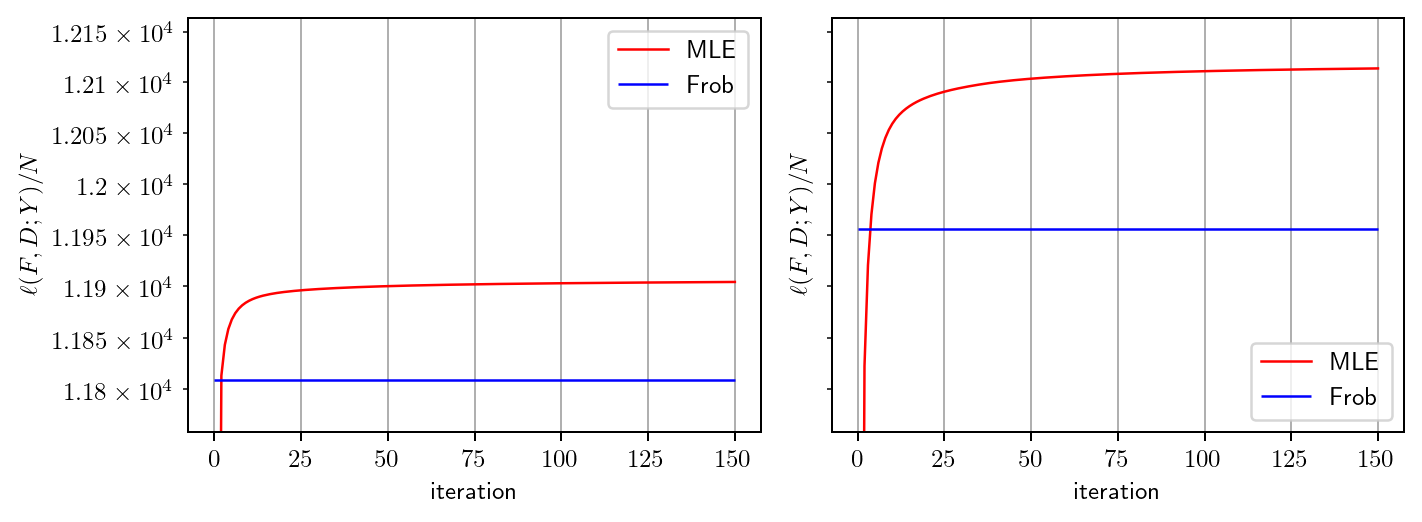

In [33]:
rs = [np.array([rank-1, 0, 0, 0, 0, 1]), np.array([14, 6, 4, 3, 2, 1])]
# ll_all = [ll_factor, ll_hier]
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}"
})
ylim = [obj_frobs[str(rs[0])].max()-50, obj_mle[str(rs[1])].max() + 50]
fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=180, sharey=True)
for i in range(2):
    ranks = rs[i]
    ll = obj_mle[str(rs[i])]
    print(f"{ranks=}, difference={(ll[-1]-obj_frobs[str(ranks)]):.2f}, %increase={(ll[-1]-obj_frobs[str(ranks)])/obj_frobs[str(ranks)]*100:.2f}")
    axs[i].plot(np.maximum(1, ll), color='r', lw=1, label=r"$\text{MLE}$")
    axs[i].set_xlabel('iteration')
    axs[i].hlines(obj_frobs[str(ranks)], 0, ll.size-1, color='b', lw=1, label=r"$\text{Frob}$")
    axs[i].set_ylabel(r'$\ell(F, D; Y)/N$')
    axs[i].set_yscale('log')
    axs[i].set_ylim(ylim)
    axs[i].grid(True)
    axs[i].legend()
    # axs[i].set_title(f"ranks$={list(ranks)}$")
# plt.show()
plt.tight_layout()
# fig.suptitle("Observed data log-likelihood", fontsize=16, y=1.05)
plt.savefig(f"plots/em_{mtype}.pdf", bbox_inches='tight')

In [25]:
with open(f"outputs/em_{mtype}.pickle", 'wb') as handle:
    lls = {"mle":obj_mle,  "frob":obj_frobs}
    pickle.dump(lls, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
with open(f"outputs/em_{mtype}.pickle", 'rb') as handle:
    mlls = pickle.load(handle)

In [35]:
mlls.keys()

dict_keys(['mle', 'frob'])